# Analytical decomposition of the Integrated Wiener Process

Hopefully we can retrieve the AFRAID Transform.

In [27]:
import numpy as np
from matplotlib import pyplot as plt 

In [28]:
def dote(n,m):
    if n==m:
        return 1.5 - 2*((-1)**n)/(np.pi*(n+0.5))
    else:
        return 1-(((-1)**n)/((n+0.5)*np.pi) + ((-1)**m)/((m+0.5)*np.pi))

Verifying the covariance kernel:

In [33]:
def unit_func(n):
    t = np.arange(100)/99
    return (np.cos((n+0.5)*np.pi*t)-1)

(0.0, 99.0, 0.0, 99.0)

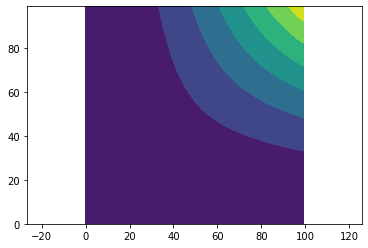

In [41]:
CN = np.zeros((100,100))

for i in range(CN.shape[0]):
    for j in range(CN.shape[1]):
        for k in range(20):
            CN[i,j] += 2/((np.pi * (k+0.5))**4) * unit_func(k)[i] *  unit_func(k)[j]

plt.contourf(CN)
plt.axis('equal')

/Users/thinhhoang/miniforge3/envs/liberty/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


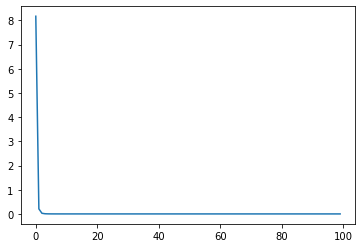

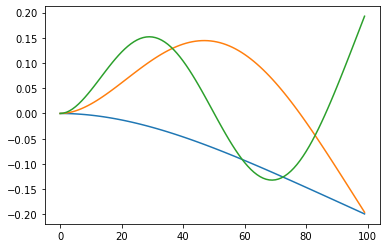

In [53]:
eigvaltrue, eigvectrue = np.linalg.eig(CN)
plt.figure()
plt.plot(eigvaltrue)
plt.figure()
for i in range(3):
    plt.plot(np.real(eigvectrue[:,i]))

/Users/thinhhoang/miniforge3/envs/liberty/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


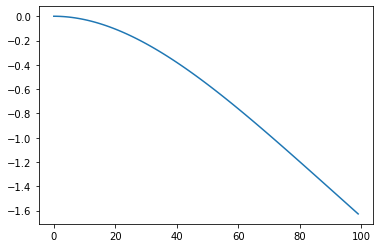

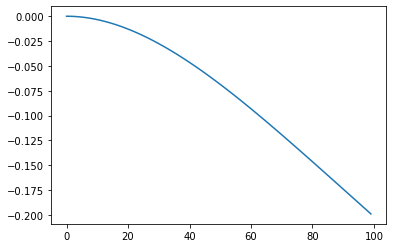

In [57]:
plt.plot(np.real(CN @ eigvectrue[:,0]))
plt.figure()
plt.plot(eigvectrue[:,0])

Hence the covariance kernel seems correct!

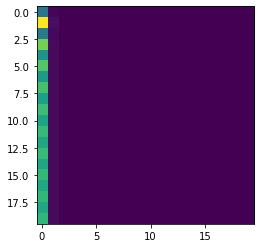

In [43]:
# The integration operator

A = np.zeros((100,100))
for i in range(A.shape[0]):
    for k in range(A.shape[1]):
        A[i,k] = (2/((np.pi * (k+0.5))**4)) * dote(i,k)

plt.imshow(A[:20,:20])

In [44]:
eigval, eigvec = np.linalg.eig(A)

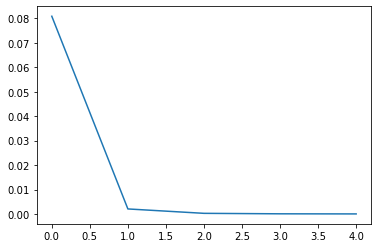

In [45]:
plt.plot(eigval[:5])

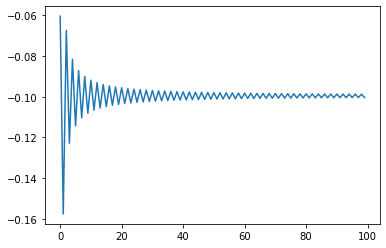

In [46]:
for i in range(1):
    plt.plot(eigvec[:,i])

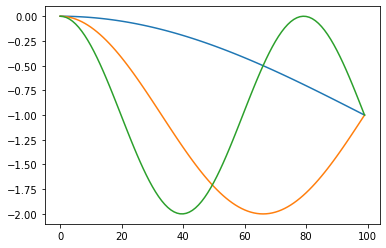

In [47]:
for i in range(3):
    plt.plot(unit_func(i))

In [48]:
B = np.zeros((100,100))
for i in range(B.shape[1]):
    B[:,i] = unit_func(i)

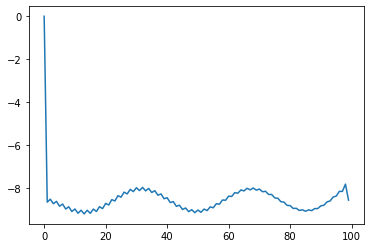

In [51]:
plt.plot(B @ eigvec[:,5])